In [1]:
import numpy as np
import pandas as pd
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [9]:
#randn generate 1000 array where each array has 2 columns.......adding array generate values to add in each array
r_[10*randn(1000,2)+array([70,30]),
  10*randn(1000,2)+array([10,10])]

array([[60.37643665, 21.26441897],
       [77.92631554, 19.89679065],
       [64.59677539, 37.29010286],
       ...,
       [11.96286241, 13.36072439],
       [10.50721819,  9.37098624],
       [-1.62252487, 11.37037789]])

In [12]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

In [17]:
data[:,0] #first raw of all arrray is extracted as 0.........

array([69.25003286, 47.78283996, 64.90017849, ..., 49.82104128,
       49.6820617 , 48.11001467])

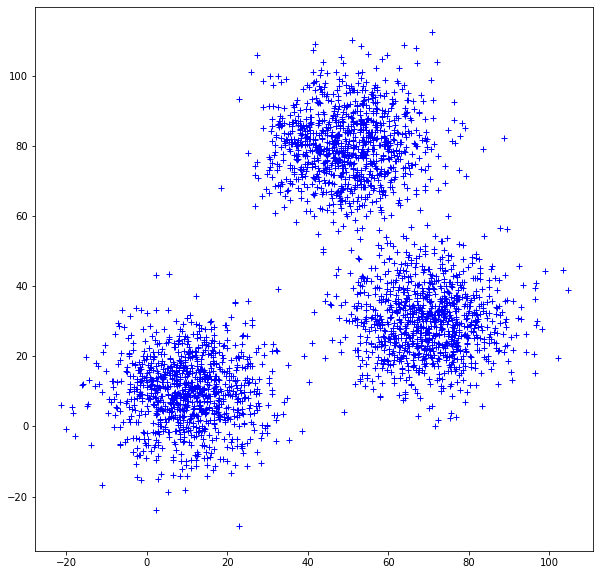

In [16]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

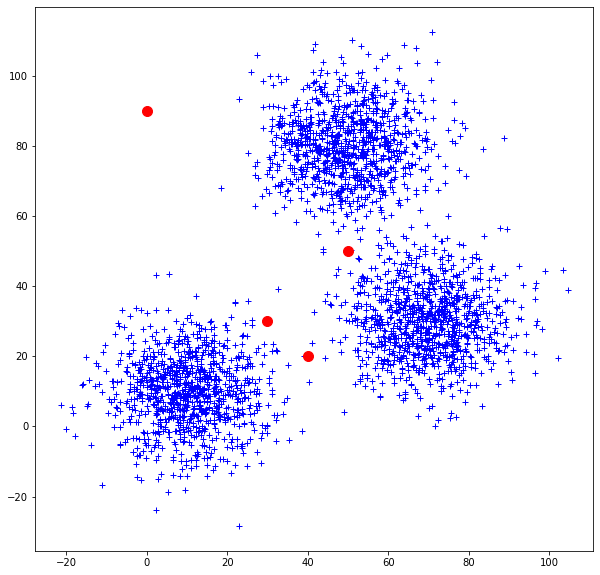

In [18]:
protos = array([[30,30],[40,20],[0,90],[50,50]]) # Initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

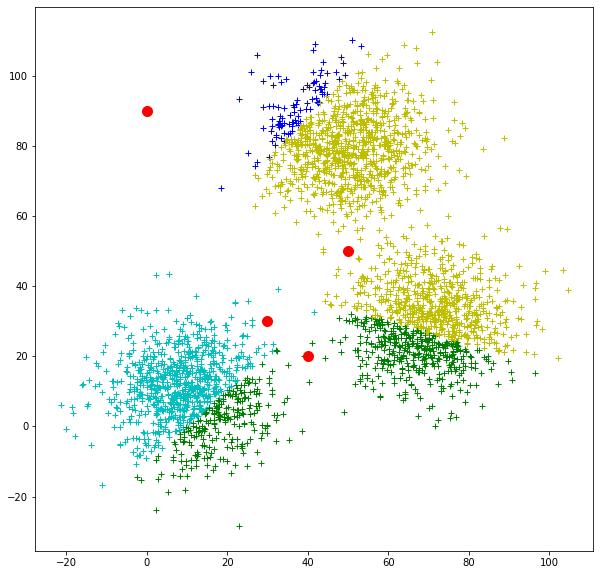

In [19]:
figsize(10,10)
dists = cdist(protos,data) #check distance between points as both are arrays
closest = argmin(dists,axis=0)   # here colsest distance is found
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])  #simply coloring is done here
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [20]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

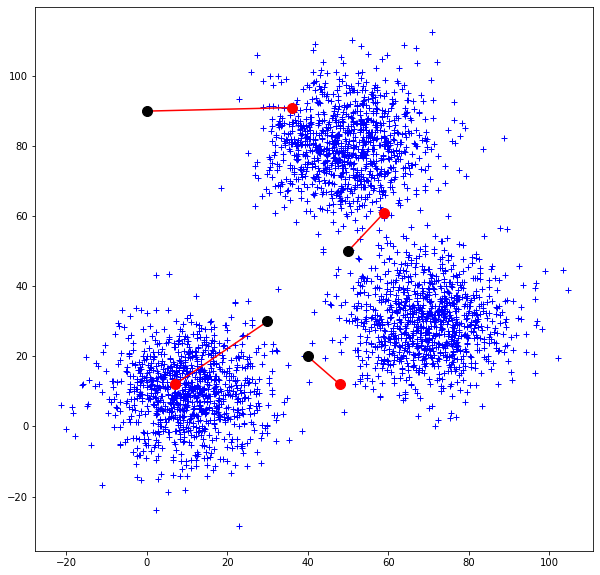

In [21]:
# Plotting the centroid movements
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [22]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

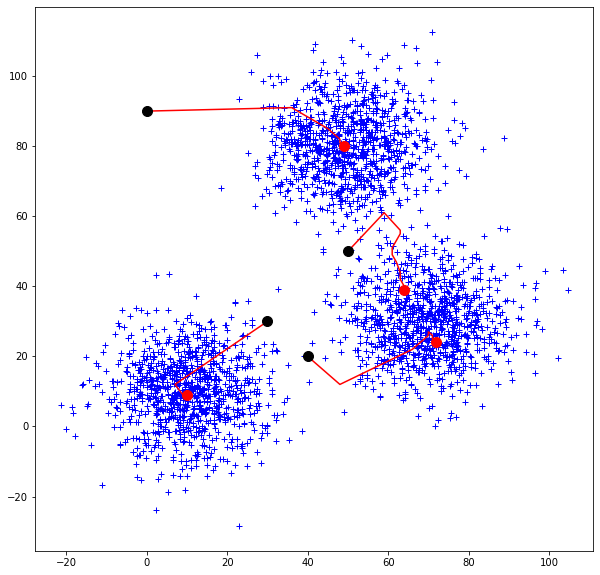

In [23]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

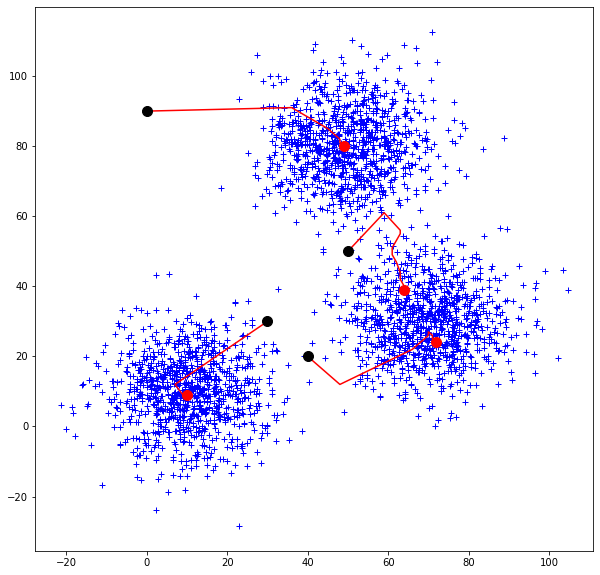

In [24]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

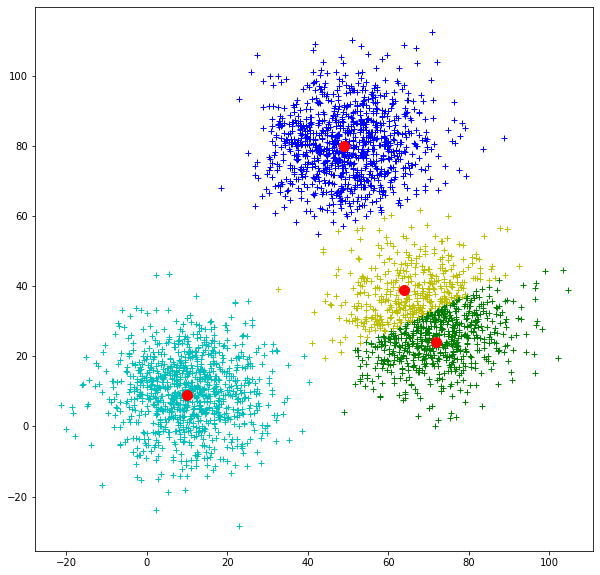

In [25]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [26]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# Actual dataset 


In [27]:
dataset=pd.read_csv('Mall_Customers.csv')

In [28]:
#dataset
X=dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### elbow method


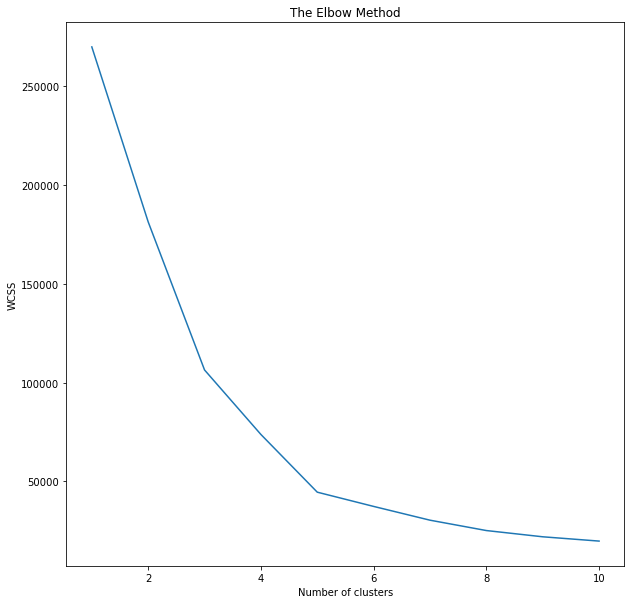

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   #find out wcss values for each k values
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## How to extract cluster from given dataset

In [33]:
X[y_kmeans == 0]    ##this is because X and y_Kmeans both have same indexes

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


## How to plot clustering into graphs

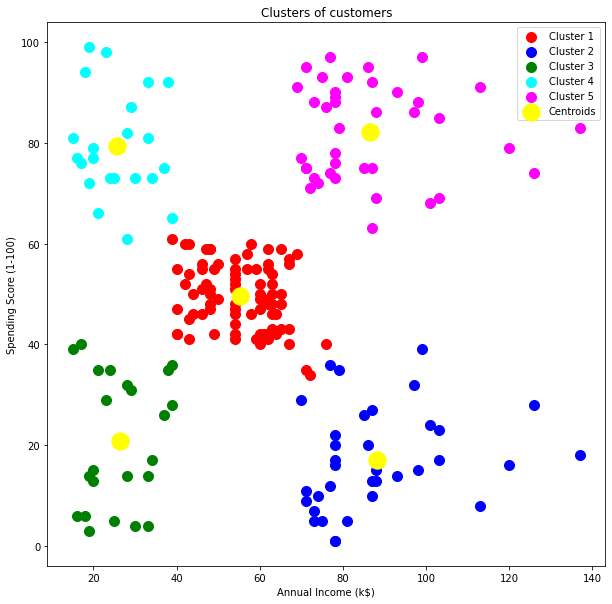

In [34]:
# Visualising the clusters
# there are two[] used one is for cluster and seond is for to identify columns
# s = size , c = color , label = label to cluster
# cluster_centers_ is used to identify centroid for that cluster
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Custom Centroid Initialization

If you already know approximately where the centroids should be (e.g., if you ran
another clustering algorithm earlier), then you can set the init hyperparameter to a
NumPy array containing the list of centroids, and set n_init to 1:


good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

###### Challenges and improvements in K-Means:

1.	We need to specify the number of clusters beforehand.
2.	It is required to run the algorithm multiple times to avoid a sub-optimal solution
3.	K-Means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes.
4.	The clusters sometimes vary based on the initial choice of the centroids. An important improvement to the K-Means algorithm, called **K-Means++**, was proposed in a _2006 paper by David Arthur and Sergei Vassilvitskii_. They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this makes the K-Means algorithm much less likely to converge to a suboptimal solution.
5.	Another important improvement to the K-Means algorithm was proposed in a _2003 paper by Charles Elkan_.It considerably accelerates the algorithm by avoiding many unnecessary distance calculations: this is achieved by exploiting the _triangle inequality_ (i.e., the straight line is always the shortest; in a triangle with sides a,b and c=> **a+b>c**) and by keeping track of lower and upper bounds for distances between instances and centroids. 
6.	Yet another important variant of the K-Means algorithm was proposed in a _2010 paper by David Sculley_. Instead of using the full dataset at each iteration, the algorithm is capable of using **mini-batches**, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the **MiniBatchKMeans** class. You can just use this class like the KMeans class:


from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)